In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['figure.figsize']=[5.0, 5.0]
matplotlib.rcParams['figure.dpi']=100
matplotlib.rcParams['font.size']=14

In [2]:
home='./emulator_profiles/' #point to your profiles
suite='SIMBA' #SIMBA or IllustrisTNG
feedback_type='ASN1' #ASN1, ASN2, AAGN1, AAGN2
profile_type='rho_mean' #rho_mean,rho_med,pth_mean,pth_med - mean or median, density or thermal pressure
interpolation_type='linear' #this is the Rbf interpolation function

In [3]:
def return_emulated_profile(A, z, logM, 
                            profile_type=profile_type, 
                            feedback_type=feedback_type, 
                            home=home, suite=suite, interpolation_type=interpolation_type): 
    
    import scripts.helper_functions as fs

    '''
    Inputs:
        A: feedback strength (float)
        z: redshift (float)
        logM: halo mass in log10 Msun
    Return:
        r: radial bins in Mpc (numpy array)
        profile: emulator profile values in log10 cgs units (numpy array)
    '''
    mass=fs.mass
    mass_str=fs.mass_str
    snap=fs.snap
    redshifts=fs.choose_redshift(suite)
    vary,sims=fs.choose_vary(feedback_type)
    samples=fs.cartesian_prod(vary,redshifts,mass) 
    nsamp=samples.shape[0]

    samples,r,y,emulator=fs.build_emulator_3D(home,suite,feedback_type,profile_type,interpolation_type)

    params=[[A, z, logM]] #the order here is important- A, then z, then logM
    profile = emulator(params)
    
    return r, profile

Text(0, 0.5, '$\\rho_{\\rm mean} [{\\rm g\\, cm^{-3}}]$')

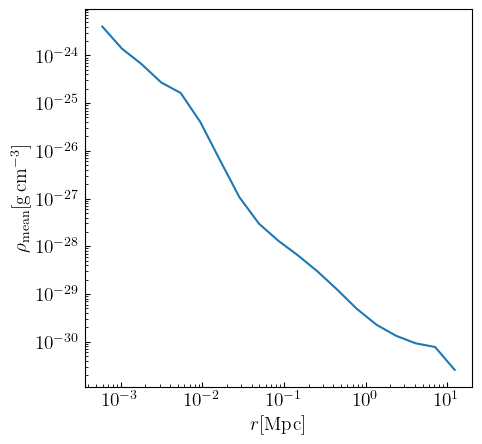

In [4]:
A = 1.2
z = 0.2
logM = 12.7
r, prof = return_emulated_profile(A, z, logM, profile_type='rho_mean') 
plt.loglog(r,10**prof)
plt.xlabel(r'$r [{\rm Mpc}]$')
plt.ylabel(r'$\rho_{\rm mean} [{\rm g\, cm^{-3}}]$')

Text(0, 0.5, '$P_{\\rm th,mean} [{\\rm erg\\, cm^{-3}}]$')

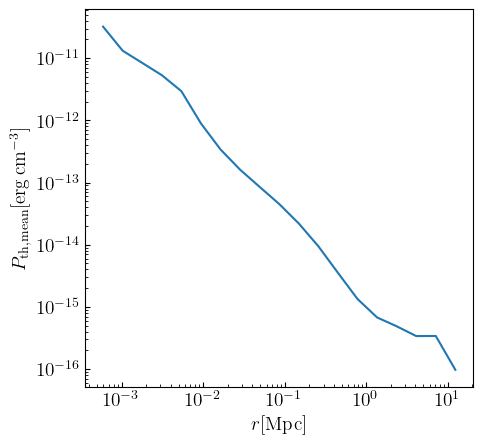

In [5]:
A = 1.2
z = 0.2
logM = 12.7
r, prof = return_emulated_profile(A, z, logM, profile_type='pth_mean') 
plt.loglog(r,10**prof)
plt.xlabel(r'$r [{\rm Mpc}]$')
plt.ylabel(r'$P_{\rm th,mean} [{\rm erg\, cm^{-3}}]$')